## Step 2.0.0 : Data Collection and Overview

In [1]:
#Load all essential libraries
#================================================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

#Load the titanic data(downloaded from Kaggle)
df = pd.read_csv('titanic_data.csv')

In [2]:
# 2.2.1 (Check the number of rows and columns)
#================================================================================================
df.shape

(891, 12)

In [3]:
# 2.3.1 (Display the first and last few rows)
#================================================================================================
# first 5 rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# last 5 rows
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
# 2.4.1 - Identify data types (numerical, categorical, textual, etc.)
#================================================================================================
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 2.5.1 - Display the numeric data basic statistics (count , mean, std, min, max etc.)
#================================================================================================

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3.0.0 Data Cleaning

In [8]:
# 3.1.1 - Detect missing data using .isnull() or .isna().
#================================================================================================

#missing_values = df.isnull().sum()
missing_values = df.isna().sum()
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Percentage of missing values per column
#================================================================================================
missing_percentage = df.isnull().mean() * 100
missing_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
# Create a sub-dataset using only numeric columns for specific processing later
df_numeric = df.select_dtypes(include=[np.number])
# Create a sub-dataset using only integer columns for specific processing later
df_numeric_int = df.select_dtypes(include=[np.integer])
# Create a sub-dataset using only text columns for specific processing later
df_text = df.select_dtypes(include=['object'])

In [12]:
# 3.2.1 Identify outliers using z-scores, IQR
#================================================================================================
# Remove rows with NaN values in numeric columns for simplicity
df_numeric = df_numeric.dropna()

# Z-Score Method
z_scores = np.abs(stats.zscore(df_numeric))
df_z_scores = pd.DataFrame(z_scores, columns=df_numeric.columns)
outliers_z = (df_z_scores > 6).any(axis=1)


# Display outliers
print("Outliers detected by Z-Score Method:")
df_numeric[outliers_z]

Outliers detected by Z-Score Method:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
258,259,1,1,35.0,0,0,512.3292
678,679,0,3,43.0,1,6,46.9000
679,680,1,1,36.0,0,1,512.3292
737,738,1,1,35.0,0,0,512.3292


In [14]:
# IQR Method
def detect_outliers_iqr(df):
    outliers = pd.DataFrame()
    for column in df.columns:
        if df[column].dtype in [np.int64, np.float64]:
            Q1 = df[column].quantile(0.05)
            Q3 = df[column].quantile(0.95)
            IQR = Q3 - Q1
            outliers[column] = ~((df[column] >= (Q1 - 1.5 * IQR)) & 
                                 (df[column] <= (Q3 + 1.5 * IQR)))
    return outliers.any(axis=1)

outliers_iqr = detect_outliers_iqr(df_numeric)


print("\nOutliers detected by IQR Method:")
df_numeric[outliers_iqr]


Outliers detected by IQR Method:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
258,259,1,1,35.0,0,0,512.3292
678,679,0,3,43.0,1,6,46.9000
679,680,1,1,36.0,0,1,512.3292
737,738,1,1,35.0,0,0,512.3292


In [16]:
# 3.3.1 - Check for Range or Value Consistency
#================================================================================================
# Check for out-of-range values in numerical columns
def check_range_consistency(df, column_name, min_value, max_value):
    return df[(df[column_name] < min_value) | (df[column_name] > max_value)]

# Example: Check for age values outside the range [0, 100]
inconsistent_age = check_range_consistency(df, 'Age', 0, 70)
print("Inconsistent Age values:")
inconsistent_age

Inconsistent Age values:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [17]:
# Example: Check for age values outside the range [0, 100]
inconsistent_Fare = check_range_consistency(df, 'Fare', 0, 500)
print("Inconsistent Fare values:")
inconsistent_Fare

Inconsistent Fare values:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [18]:
# 3.3.2 - Check for unexpected values in categorical columns
#================================================================================================

# Define expected values
expected_values = {'Pclass': [1, 2, 3], 'Embarked': ['C', 'Q', 'S']}  
def check_categorical_consistency(df, column_name, expected_values):
    return df[~df[column_name].isin(expected_values)]

# Example: Check for unexpected values in 'embarked' column
unexpected_embarked = check_categorical_consistency(df, 'Embarked', expected_values['Embarked'])
print("Unexpected values in 'embarked':")
unexpected_embarked

Unexpected values in 'embarked':


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [19]:
# 3.3.3 - Check for uniqueness is expected in a specific column e.g. national ID or SSN etc.
#================================================================================================

# Check if 'ticket' column has unique values (if it should be unique)
duplicate_tickets = df[df.duplicated('Ticket', keep=False)]

print("Duplicate tickets:")
duplicate_tickets

Duplicate tickets:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


In [20]:
# 3.5.1 - Identify duplicate rows.
#================================================================================================
duplicates = df[df.duplicated()]

# Print the number of duplicate rows
print(f"Number of duplicate rows: {duplicates.shape[0]}")

# Show duplicate rows
print("Duplicate rows:")
print(duplicates)

# Optionally, you can remove duplicate rows
df_cleaned = df.drop_duplicates()

# Verify that duplicates are removed
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of duplicate rows: 0
Duplicate rows:
Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []
Number of rows after removing duplicates: 891


## 5.0.0	Univariate Analysis

['PassengerId', 'Survived', 'Pclass', 'SibSp', 'Parch']


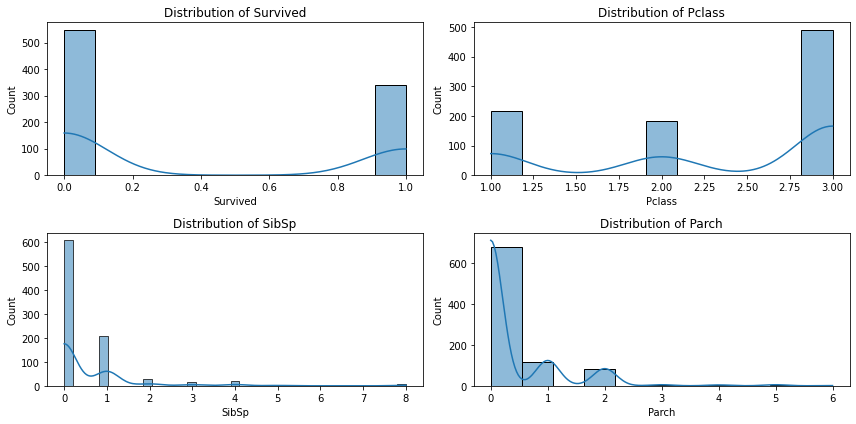

In [22]:
# 5.1.1 - Histograms, box plots, density plots, and Q-Q plots
#================================================================================================
numeric_cols = list(df_numeric_int.columns)
print(numeric_cols)
numeric_cols.remove('PassengerId')
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols):
    plt.subplot(round(len(numeric_cols)/2), round(len(numeric_cols)/2 + 0.5), i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

['Survived', 'Pclass', 'SibSp', 'Parch']


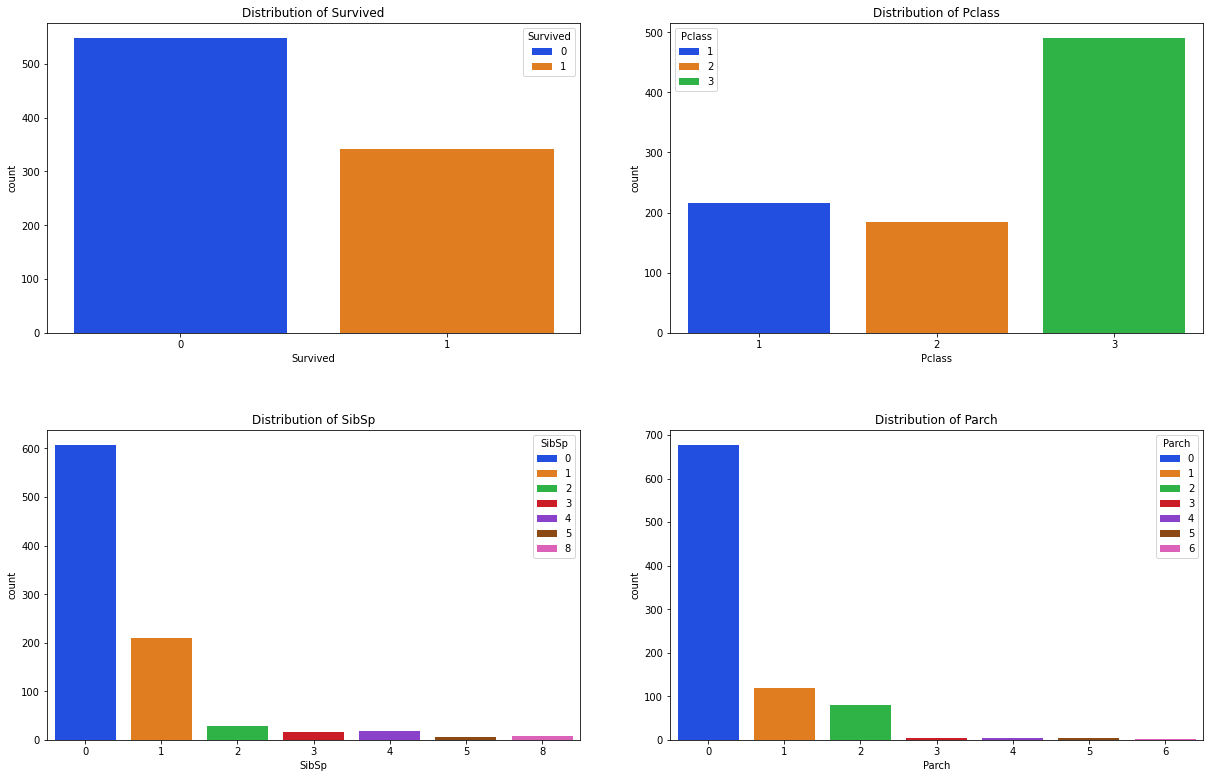

In [24]:
numeric_cols = list(df_numeric_int.columns)
sns.set_palette("bright")
numeric_cols.remove('PassengerId')
print(numeric_cols)
plt.figure(figsize=(18, 12))
for i, col in enumerate(numeric_cols):
    plt.subplot(round(len(numeric_cols)/2), round(len(numeric_cols)/2 + 0.5), i+1)
    sns.countplot(x=col, data=df, hue=col,palette="bright")
    plt.title(f'Distribution of {col}')
plt.tight_layout(pad = 5.0)
plt.show()

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


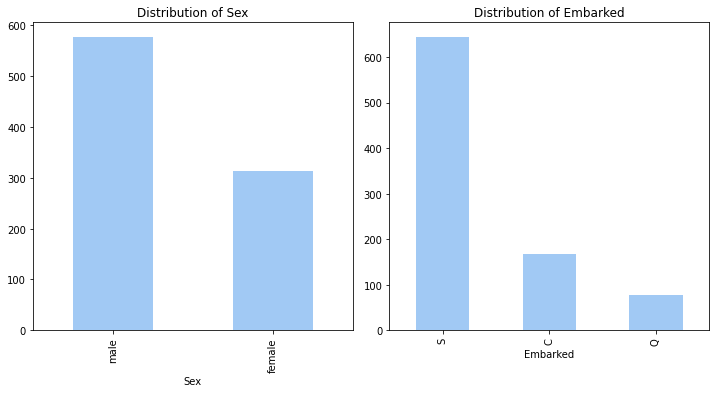

In [26]:
# 5.2.1 - Categorical variable Bar plots, pie charts, and frequency counts.
#================================================================================================
text_cols = list(df_text.columns)
print(text_cols)

sns.set_palette("pastel")

# Categorical variables
plt.figure(figsize=(15, 10))
for i, col in enumerate(['Sex', 'Embarked']):
    plt.subplot(2, 3, i+1)
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

## 6.0.0	Bivariate Analysis

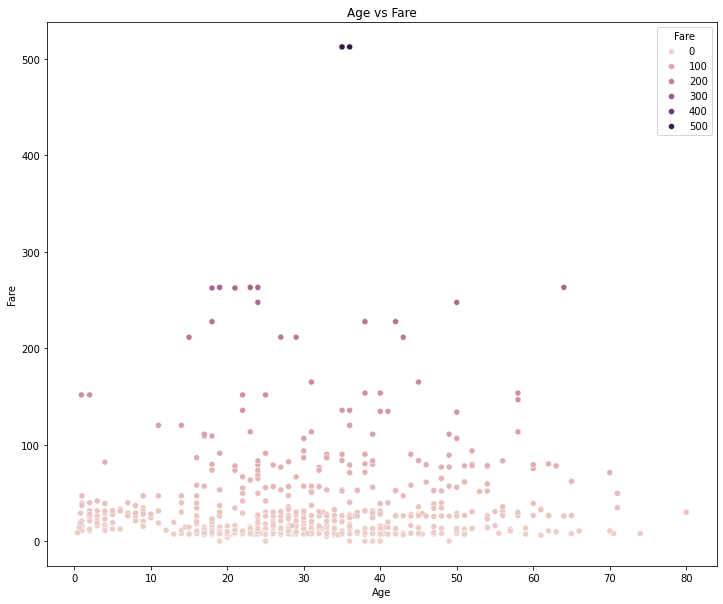

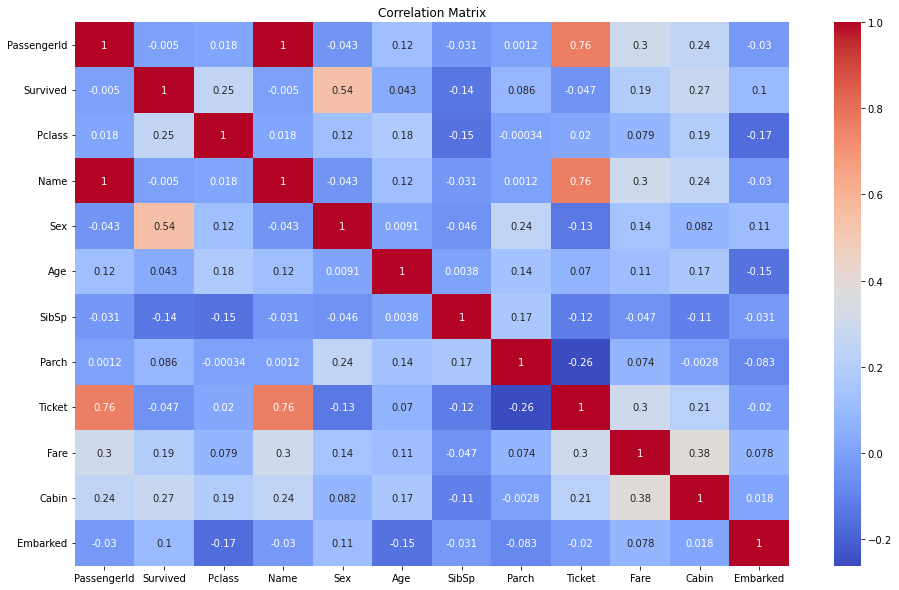

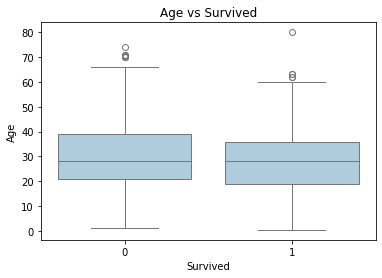

In [28]:
# Scatter plot for numerical features (e.g., Age vs Fare)
sns.set_palette("Paired")
plt.figure(figsize=(12,10))
sns.scatterplot(x='Age', y='Fare', data=df, hue='Fare')
plt.title('Age vs Fare')
plt.show()

# Correlation matrix heatmap
#corr = df.corr(method='pearson', min_periods=1, numeric_only=False)
corr = df.apply(lambda x : pd.factorize(x)[0]).corr()
plt.figure(figsize=(16,10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix')
plt.show()
# Box plot for numerical vs categorical (e.g., Age vs Survived)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age vs Survived')
plt.show()

## 7.0.0 Multivariate Analysis

<Figure size 432x288 with 0 Axes>

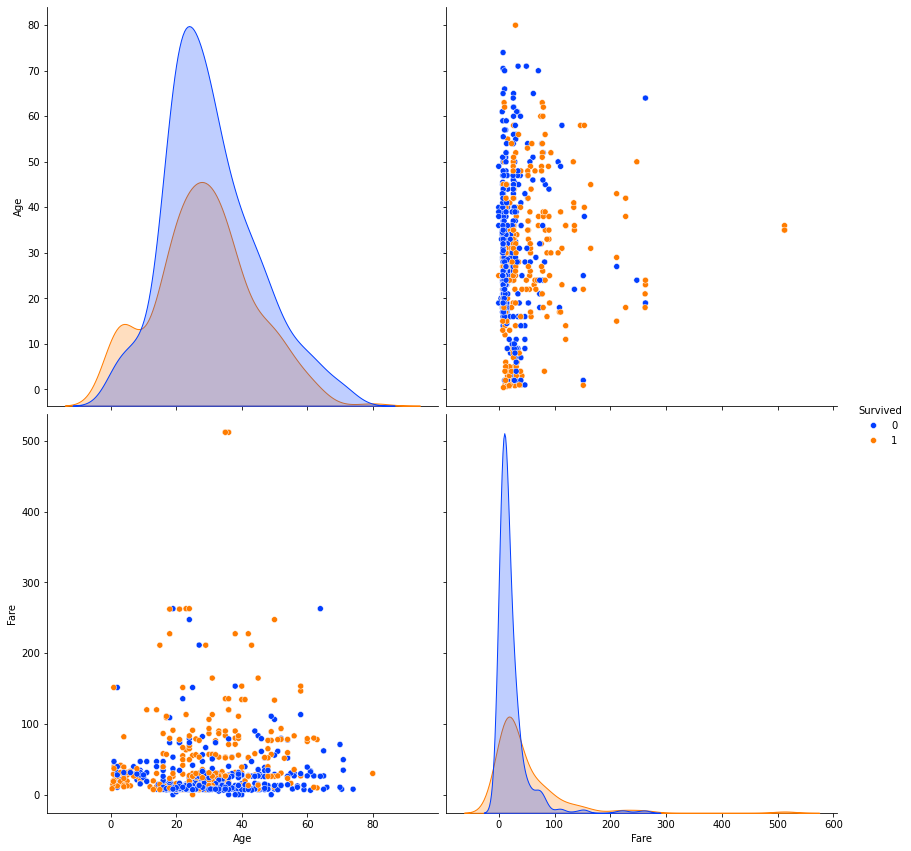

In [30]:
# 7.1.1 - Use pair plots to visualize relationships between multiple features
#================================================================================================
import warnings

# Pair plot
# Suppress the specific warning
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
plt.tight_layout(pad=5)  # You can adjust the padding if necessary
sns.pairplot(df[['Age', 'Fare', 'Survived']], hue='Survived',palette="bright",height=6)
plt.show()

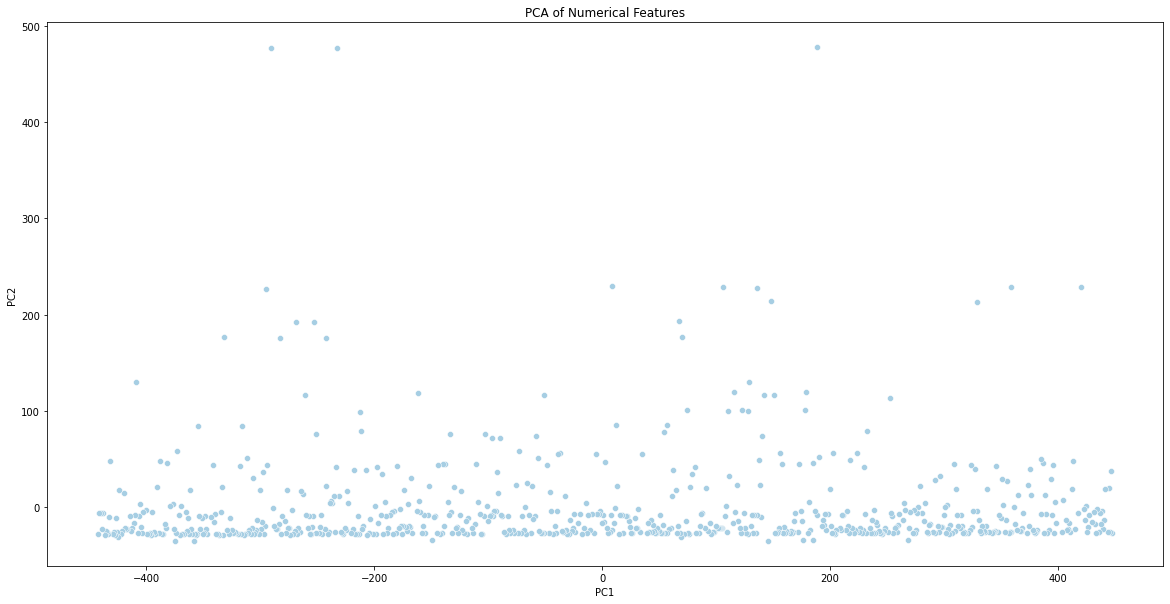

In [31]:
# 7.2.1 - Apply PCA, t-SNE, or LDA for high-dimensional data.
#================================================================================================
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_numeric)
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
plt.figure(figsize=(20,10))
sns.scatterplot(x='PC1', y='PC2', data=df_pca)
plt.title('PCA of Numerical Features')
plt.show()

## 9.0.0	Domain Knowledge and Hypothesis Testing

In [32]:
# 9.2.1 - Perform hypothesis tests (e.g., normality tests, ANOVA, chi-square).
#================================================================================================
for feature in numeric_cols:
    stat, p = stats.normaltest(df[feature])
    print(f"Normal test for {feature}: statistic={stat:.4f}, p-value={p:.4f}")


Normal test for Survived: statistic=4070.9171, p-value=0.0000
Normal test for Pclass: statistic=1437.1090, p-value=0.0000
Normal test for SibSp: statistic=722.8740, p-value=0.0000
Normal test for Parch: statistic=543.0353, p-value=0.0000


## 13.0.0	Data Quality Checks and Anonymization

In [33]:
# 13.2.1 - Identify and handle any personally identifiable information (PII) using Data Anonymization technique
#================================================================================================

import hashlib
def hash_name(name):
    # Convert the name to a string and encode it
    name_bytes = name.encode()
    # Create a hash object using SHA-256 algorithm
    hash_object = hashlib.sha256(name_bytes)
    # Get the hexadecimal representation of the hash
    hash_hex = hash_object.hexdigest()
    return hash_hex
# Apply the hashing function to the 'Name' column
df['Name_Hashed'] = df['Name'].apply(hash_name)

# Drop the original 'Name' column if no longer needed
df = df.drop(columns=['Name'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_Hashed
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,6c969dc7ad8ff99ae4959829c664e8537f5f98a23f41c1...
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,f7ad2d69edefb38cae0679b6e6a8953b3f5892c9d12a57...
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7eb1fa77712a2b7aae183c39084f0ea0c9399488229bc2...
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,c8a06e7446f04298d047e50e9ae4df4b0b63a437da6762...
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,885e53ea6ed5a0ed33e075f1ebe2453a6c9eb1aa84053d...
